# Entendendo o que é pra fazer ♥

A Flor de Iris tem cerca de 280 espécies reconhecidas atualmente e nosso objetivo é criar um algoritmo que identifique três  delas: Iris Versicolor, Iris Setosa e Iris Virginica. Por sorte, a biblioteca Scikit-learn já possui internamente um conjunto de dados com todas essas informações \o/\o/

![title](http://www.spataru.at/iris-dataset-svm/iris_types.jpg)

E iremos identificar qual o tipo pela medida da pétala e sépala.

![title](http://www.robosoup.com/wp-content/uploads/2016/02/iris_petal_sepal.png)

# Conhecendo a base de dados ♥

In [1]:
#Importando o dataset que utilizaremos para criar nosso modelo
from sklearn.datasets import load_iris

# Carregando e visualizando as chaves do nosso dicionário
iris = load_iris()
iris.keys()

dict_keys(['data', 'DESCR', 'feature_names', 'target', 'target_names'])

In [2]:
print(type(iris.DESCR))
print(iris.DESCR+'\n') #Descrição do Database

<class 'str'>
Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute V

Termos importantes para saber:
- **Samples**: Amostra, em tradução livre  —  nada mais é que uma linha em um dataset, em nosso caso, cada flor medida.
- **Feauture**: São as características que uma sample possui.

In [3]:
print(type(iris.target_names))
iris.target_names #tipos de iris

<class 'numpy.ndarray'>


array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [4]:
print(type(iris.feature_names))
iris.feature_names #descrição de cada feature

<class 'list'>


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.data.shape #150 samples e 4 feauture 

(150, 4)

In [6]:
print(type(iris.feature_names))
iris.data[:10]

<class 'list'>


array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1]])

In [7]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Conjuntos de treino e teste ♥

Agora, dividiremos nossa base em dois: o conjunto de treino e o conjunto de teste.
O treino conterá 75% dos dados de nosso dataset e ele servirá para ensinarmos o nosso código a prever novas informações
no futuro. Já o teste será usado para testarmos nossa aplicação com informações que ela nunca viu antes,
a fim de sabermos se ela previu corretamente o tipo de Íris.

Para fazer isso, usaremos a função train_test_split do scikit-learn.

In [8]:
#Para dividir nosso dataset em dois conjuntos: treino e teste.
from sklearn.model_selection import train_test_split
train_test_split?

In [9]:
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], random_state = 0)

print(X_train.shape)
print(X_test.shape)

(112, 4)
(38, 4)


## Visualizando os dados ♥

In [10]:
#Para criação de gráficos
import matplotlib.pyplot as plt

#Faz com que os gráficos sejam criados dentro do Notebook e ñ em outra janela
%matplotlib inline

### gráfico de dispersão

Dúvidas sobre o Subplots:
**plt.subplots?**

*Assinatura: plt.subplots(nrows=1, ncols=1, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)*

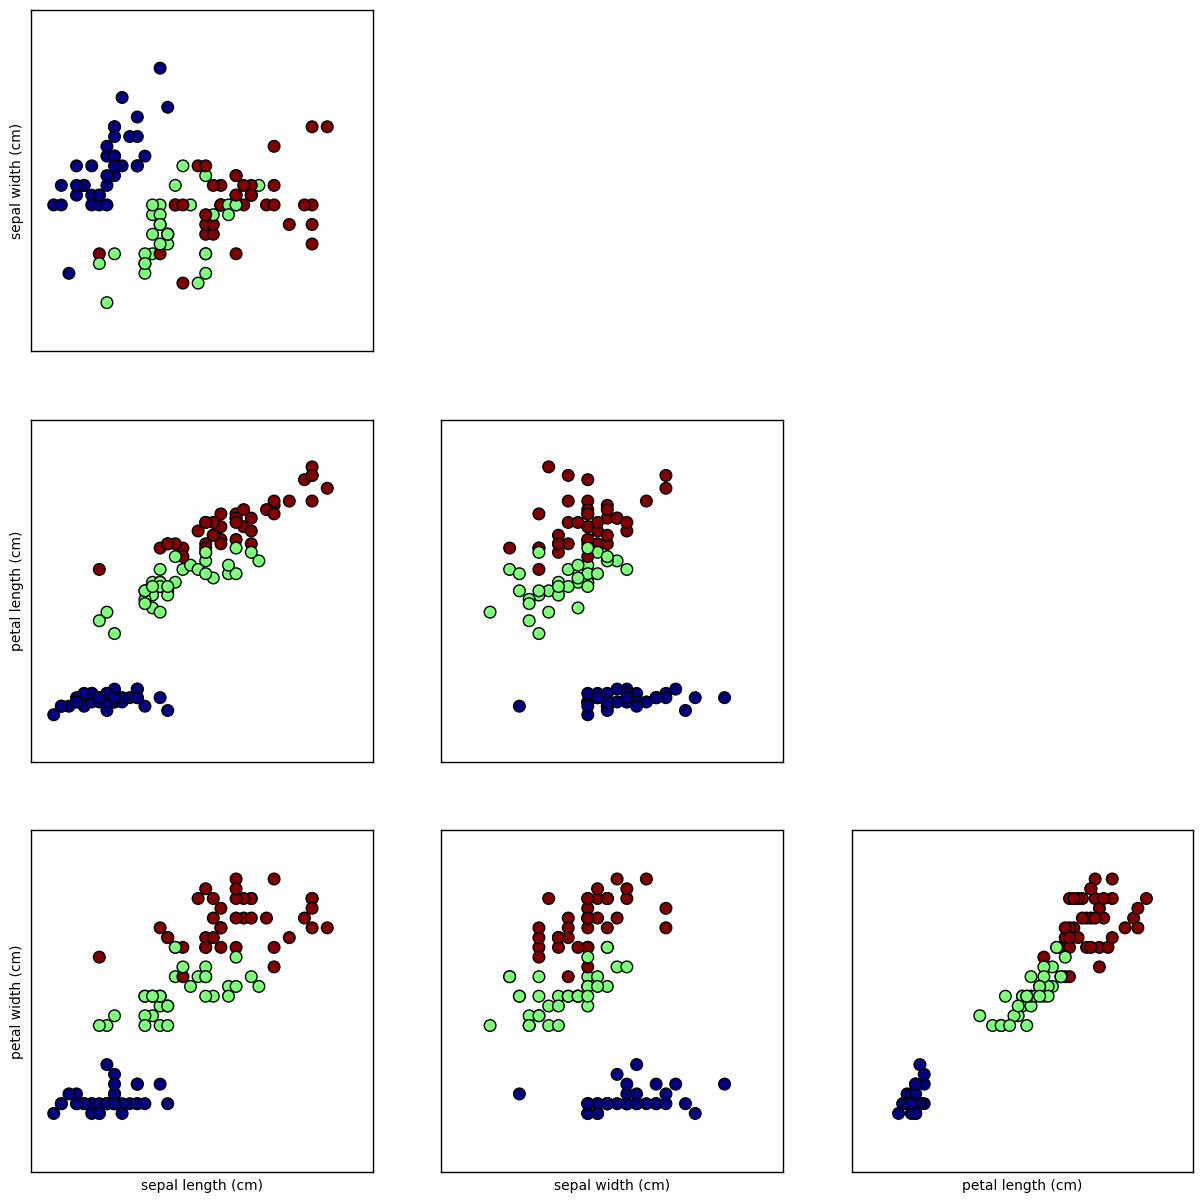

In [11]:
fig, ax = plt.subplots(3, 3, figsize=(15,15))

for i in range(3):
    for j in range(3):
        ax[i,j].scatter(X_train[:,j], X_train[:, i + 1], c=y_train, s=70)
        ax[i,j].set_xticks(())
        ax[i,j].set_yticks(())
        
        if i == 2:
            ax[i,j].set_xlabel(iris['feature_names'][j])
        if j == 0:
            ax[i,j].set_ylabel(iris['feature_names'][i + 1])
        if j > i:
            ax[i,j].set_visible(False)
        

"Como podemos ver no gráfico, os dados parecem estar muito bem distribuídos. Isso permitirá uma precisão maior do modelo, uma vez que as informações são bem variadas para cada tipo de Íris. Imagine, por exemplo, se as flores da espécia Setosa tivessem as mesmas medidas da Versicolor. Isso faria com que nosso modelo tivesse dificuldades em prever novas flores inseridas mais tarde." - Paulo vasconcelos

## O Algoritmo K-Nearest Neighbor ♥

Para criar o modelo de Machine Learning, será usado o algoritmo K-Nearest Neighbor, ou KNN.

O KNN analisa o literalmente o vizinho mais próximo (*Nearest Neighbor*) da seguinte forma: 
- 01. Ele mapeia os dados já contidos no dataset
- 02. As novas informações são inseridas para serem previstas
- 03. O código verifica qual ponto mais próximo daquele novo dado

No exemplo abaixo, a chance no novo elemento 'X' pertecer ao grupo dos vermelho é maior que a de ser dos verdes. Já a chance de ser azul é nula.

![title](http://img.blog.csdn.net/20130502162127782)

## Criando um modelo ♥

In [12]:
#Algoritmo que será utilizado para classificação
from sklearn.neighbors import KNeighborsClassifier

#Creating the model
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

O argumento **n_neighbors=1** indica a quantidade de vizinhos que precisamos que nosso código leve em consideração antes de prever o tipo de flor. Se mudassemos para n_neighbors=2, seria necessário passar por dois pontinhos, do mesmo tipo, antes que classificar o tipo da flor.

## Testando o nosso modelo ♥

In [13]:
#Importando o Numpy para criar o array X_new
import numpy as np

#Testando o modelo
X_new = np.array([[5, 2.9, 1, 0.2]])
X_new.shape

(1, 4)

In [14]:
prediction = knn.predict(X_new)
prediction

array([0])

Passo a passo:
- No código acima foi criado o a variável X_new e atribuido quatro medidas de uma Flor de Íris
- Depois, foi criado a variável prediction, onde foi armazenado o resultado da previsão
- A previsão foi array([0]), isso significa que a flor é da espécie Setosa como visto abaixo

In [15]:
iris.target_names[prediction]

array(['setosa'], 
      dtype='<U10')

## Precisão e funcionalidade ♥

In [16]:
#Accuracy of the model
knn.score(X_test, y_test)

0.97368421052631582

Isso significa que o modelo tem uma precisão de 97%!

## Agora teste você!!!

In [17]:
print("Informe as medidas da sua Flor de Íris abaixo:")
sepal_length = input("Comprimento da sépala:")

Informe as medidas da sua Flor de Íris abaixo:
Comprimento da sépala:6.2


In [18]:
sepal_width = input("Largura da sépala:")

Largura da sépala:2.9


In [19]:
petal_length = input("Comprimento da pétala:")

Comprimento da pétala:4.3


In [20]:
petal_width  = input("Largura da pétala:")

Largura da pétala:1.3


In [21]:
X_new = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
prediction = knn.predict(X_new)

print("Segundo a medida informada a Flor de Íris foi classificado com o tipo %s."%(iris.target_names[prediction][0]))

Segundo a medida informada a Flor de Íris foi classificado com o tipo versicolor.


Dados para brincar:
- 6.2,2.9,4.3,1.3,Iris-versicolor
- 5.1,2.5,3.0,1.1,Iris-versicolor
- 5.7,2.8,4.1,1.3,Iris-versicolor
- 6.3,3.3,6.0,2.5,Iris-virginica
- 5.8,2.7,5.1,1.9,Iris-virginica
- 7.1,3.0,5.9,2.1,Iris-virginica
- 5.0,3.5,1.6,0.6,Iris-setosa
- 5.1,3.8,1.9,0.4,Iris-setosa
- 4.8,3.0,1.4,0.3,Iris-setosa

![title](https://vignette.wikia.nocookie.net/cardfight/images/8/87/Thats-all-folks-7172-400x250.jpg/revision/latest?cb=20140311124943)